# DTSA 5509 Supervised Learning Final Project

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone 
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline 

## Step 1: Import Data
***
The dataset used in this project is retrieved from "https://www.kaggle.com/datasets/jacopoferretti/child-vs-mother-iq?resource=download&select=kid_iq.csv".  

* kid_score : child IQ score
* mom_hs : mother's education
* mom_iq : mother's IQ
* mom_work : mother's job
* mom_age : mother's age

I removed the first column in the dataset since it was unnecessary. Then I splited the data into training and testing groups for further analysis.

In [46]:
df = pd.read_csv("kid_iq.csv")
print(df)
df = df.iloc[:, 1:]
print(df.info())
df.describe()

     Unnamed: 0  kid_score  mom_hs      mom_iq  mom_work  mom_age
0             1         65       1  121.117529         4       27
1             2         98       1   89.361882         4       25
2             3         85       1  115.443165         4       27
3             4         83       1   99.449639         3       25
4             5        115       1   92.745710         4       27
..          ...        ...     ...         ...       ...      ...
429         430         94       0   84.877412         4       21
430         431         76       1   92.990392         4       23
431         432         50       0   94.859708         2       24
432         433         88       1   96.856624         2       21
433         434         70       1   91.253336         2       25

[434 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  


,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


In [50]:
X = df[['mom_hs', 'mom_iq', 'mom_work', 'mom_age']]  
y = df['kid_score']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_train = pd.concat([y_train, X_train], axis=1)  
print(df_train.head())

     kid_score  mom_hs      mom_iq  mom_work  mom_age
66          63       1   93.498196         2       20
277        101       1  120.609045         3       20
234        102       1  106.861059         2       23
31         130       1  101.817180         2       23
84          92       1   89.951951         2       28


## Step 2: Identify a Supervised Machine Learning Problem
***
After a brief overview of the dataset, I decided to study if I can predict kids' IQ (`kid_score`) based on the mother's educational background(`mom_hs`), mother's IQ(`mom_iq`), mother's work status(`mom_work`), and mother's age(`mom_age`). In this case, kid_score will be chosen as the dependent variable, and the other columns serve as independent variables. I will apply multilinear regression  method on the dataset because the outcome is continuous.

## Step 3: Exploratory Data Analysis

<Axes: >

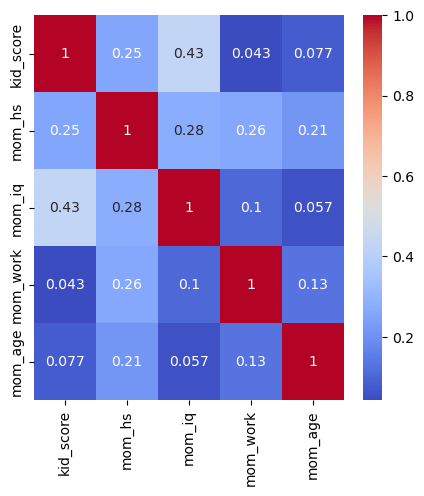

In [51]:
plt.figure(figsize=(5,5))
sns.heatmap(df_train.corr(), cmap='coolwarm', annot=True)

<Figure size 1000x1000 with 0 Axes>

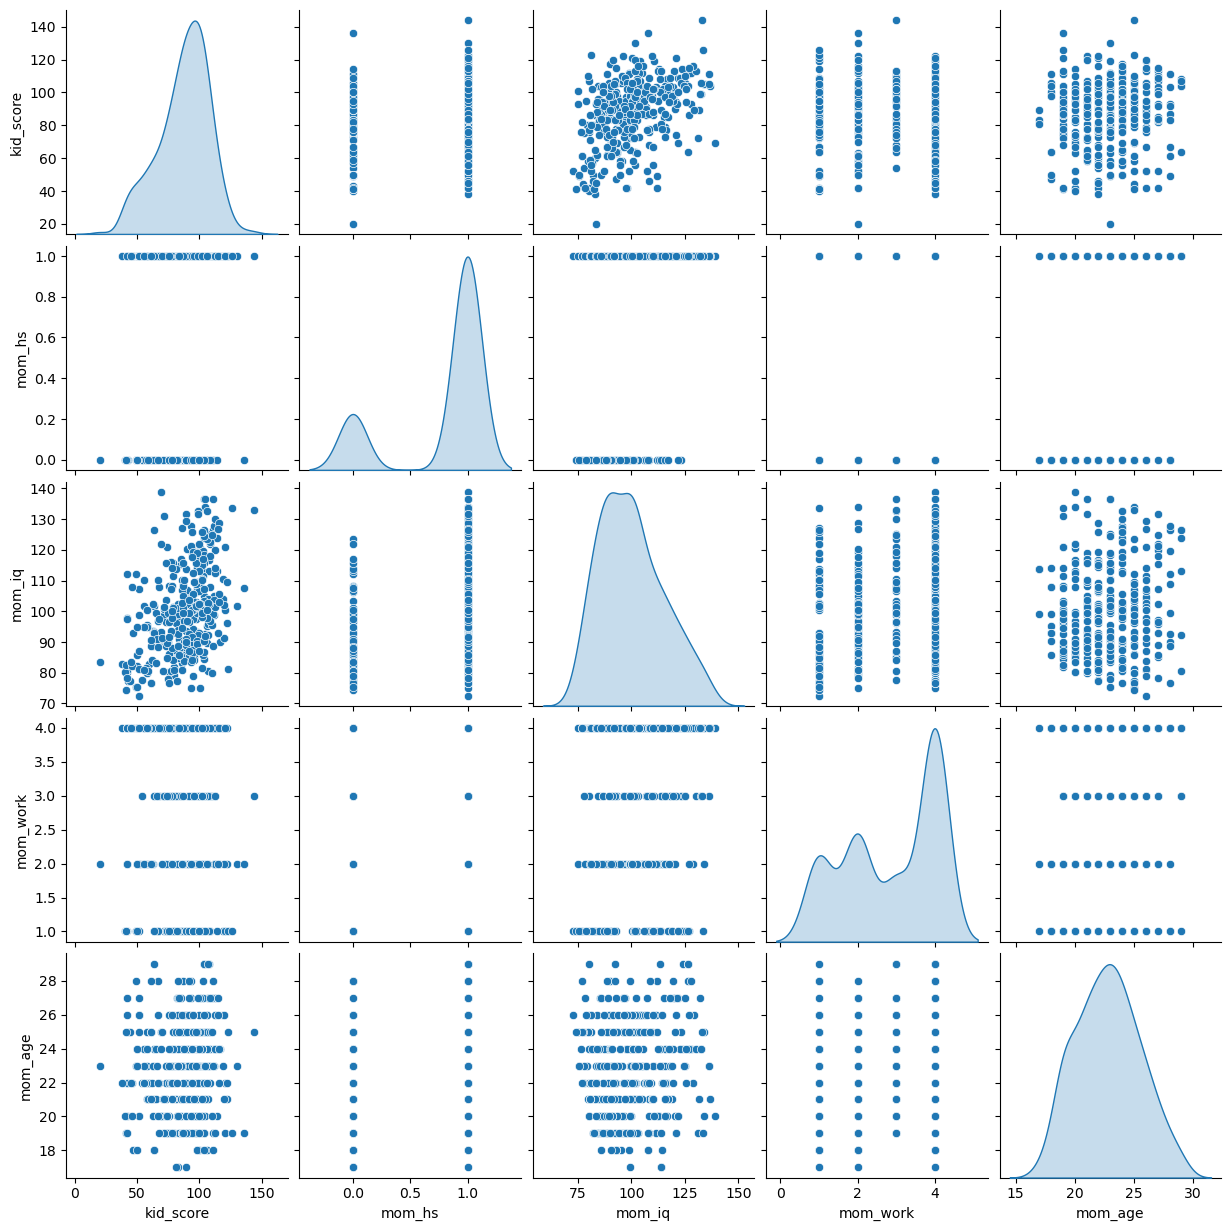

In [52]:
plt.figure(figsize=(10,10))
sns.pairplot(df_train, diag_kind = 'kde')

## Step 4: Analysis Using Supervised Machine Learning Models
***
In this step, I developed the preliminary model using the backward selection method. Then, I plotted a leverage plot to detect any possible outliers affecting the model. Finally, I applied the final model to the test data to evaluate how well it predicts the kid's IQ using the selected variables.

In [53]:
model = smf.ols(formula='kid_score ~ mom_iq + mom_hs + mom_work + mom_age', data=df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     22.49
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.65e-16
Time:                        13:55:42   Log-Likelihood:                -1495.6
No. Observations:                 347   AIC:                             3001.
Df Residuals:                     342   BIC:                             3020.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.9401     10.489      2.378      0.018       4.309      45.571
mom_iq         0.5358      0.068      7.859      0.000       0.402       0.670
mom_hs         7.4033      2.622      2.824      0.005       2.247      12.560
mom_work      -0.6911      0.857     -0.806      0.421      -2.377       0.995
mom_age        0.2159      0.372      0.580      0.562      -0.516       0.948
==============================================================================
Omnibus:                        7.649   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.745
Skew:                          -0.366   Prob(JB):                       0.0208
Kurtosis:                       3.006   Cond. No.                     1.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
model = smf.ols(formula='kid_score ~ mom_iq + mom_hs + mom_work', data=df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     29.94
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.24e-17
Time:                        13:56:01   Log-Likelihood:                -1495.7
No. Observations:                 347   AIC:                             2999.
Df Residuals:                     343   BIC:                             3015.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5471      6.842      4.319      0.000      16.090      43.004
mom_iq         0.5356      0.068      7.864      0.000       0.402       0.670
mom_hs         7.6781      2.576      2.981      0.003       2.611      12.745
mom_work      -0.6507      0.853     -0.763      0.446      -2.329       1.028
==============================================================================
Omnibus:                        7.474   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                7.586
Skew:                          -0.362   Prob(JB):                       0.0225
Kurtosis:                       2.987   Cond. No.                         713.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
model = smf.ols(formula='kid_score ~ mom_iq + mom_hs', data=df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     44.67
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           5.67e-18
Time:                        13:57:02   Log-Likelihood:                -1496.0
No. Observations:                 347   AIC:                             2998.
Df Residuals:                     344   BIC:                             3010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.2356      6.618      4.267      0.000      15.219      41.252
mom_iq         0.5338      0.068      7.847      0.000       0.400       0.668
mom_hs         7.1981      2.496      2.883      0.004       2.288      12.108
==============================================================================
Omnibus:                        7.515   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.641
Skew:                          -0.363   Prob(JB):                       0.0219
Kurtosis:                       2.980   Cond. No.                         689.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

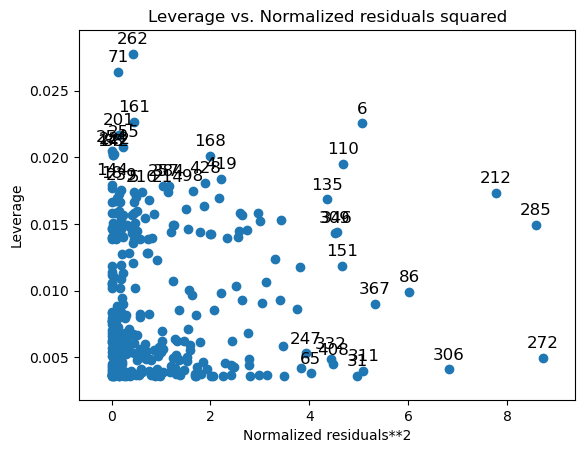

In [58]:
sm.graphics.plot_leverage_resid2(model)
plt.show()

In [59]:
possible_unusual = [212, 285, 272]
df_drop = df_train.drop(possible_unusual)
final_model = smf.ols(formula='kid_score ~ mom_iq + mom_hs', data=df_drop).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              kid_score   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     46.43
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.47e-18
Time:                        13:57:15   Log-Likelihood:                -1471.7
No. Observations:                 344   AIC:                             2949.
Df Residuals:                     341   BIC:                             2961.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.2013      6.422      4.547      0.000      16.570      41.832
mom_iq         0.5237      0.066      7.935      0.000       0.394       0.654
mom_hs         7.4596      2.442      3.054      0.002       2.655      12.264
==============================================================================
Omnibus:                        7.556   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.671
Skew:                          -0.343   Prob(JB):                       0.0216
Kurtosis:                       2.743   Cond. No.                         688.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 334.62109725213276
R^2 Score: 0.2245575326461141


## Step 5: Conclusion
***
In this analysis, I developed a regression model to predict the kid_score based on the mother's IQ(`mom_iq`) and whether the mother completed high school(`mom_hs`). After identifying and removing possible unusual data points from the dataset, the final model was assessed for its predictive accuracy and fit.

The final model, which uses `mom_iq` and `mom_hs` as predictors, achieved an R-squared value of 0.225. This suggests that approximately 22.5% of the variance in `kid_score` is explained by the model in the test group. While this is a moderate level of explanatory power, it indicates that other factors not included in the model might also play significant roles in determining `kid_score`. For example, father's IQ, father's education status, and other possible factors should be considered as well when predicting children's IQ score.

The model's moderate predictive accuracy suggests it could be useful for preliminary analysis in educational studies or interventions. However, analysts should exercise caution due to its limited explanatory power.